In [ ]:
from google.colab import files 
    
uploaded = files.upload()

TypeError: ignored

In [ ]:
import pandas as pd 
import io 

dataDF = pd.read_csv(io.BytesIO(uploaded['Formatted History.csv']))


In [ ]:
dataDF.head()

,Unnamed: 0,Item,Year,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17,Week18,Week19,Week20,Week21,Week22,Week23,Week24,Week25,Week26,Week27,Week28,Week29,Week30,Week31,Week32,Week33,Week34,Week35,Week36,Week37,Week38,Week39,Week40,Week41,Week42,Week43,Week44,Week45,Week46,Week47,Week48,Week49,Week50,Week51,Week52
0,0,20638227,2014,1,4,7,13,34,44,53,111,188,283,378,406,389,569,536,402,385,304,256,206,151,147,144,104,70,55,27,24,11,9,2,12,13,11,23,18,29,32,28,25,9,4,6,3,4,0,0,0,0,1,0,2
1,1,20638227,2015,4,2,0,12,13,23,0,78,110,156,116,326,473,541,122,534,415,374,126,225,168,112,104,123,81,48,0,14,28,12,0,14,25,30,8,47,67,106,33,58,35,23,0,11,5,1,6,3,4,0,0,2
2,2,20638227,2016,2,1,1,0,11,23,42,0,135,185,318,145,514,578,622,480,582,180,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,20638227,2017,0,0,0,10,27,36,48,78,172,246,278,299,452,431,475,393,330,329,188,189,102,116,112,80,56,28,28,26,21,13,5,8,19,38,61,57,95,86,84,67,34,36,8,15,4,5,3,0,1,0,5,1
4,4,20638227,2018,0,2,3,5,16,34,33,56,108,202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
newDataDF = dataDF[dataDF['Item'] == 20638227]
print(newDataDF)

   Unnamed: 0      Item  Year  Week1  ...  Week49  Week50  Week51  Week52
0           0  20638227  2014      1  ...       0       1       0       2
1           1  20638227  2015      4  ...       4       0       0       2
2           2  20638227  2016      2  ...       0       0       0       0
3           3  20638227  2017      0  ...       1       0       5       1
4           4  20638227  2018      0  ...       0       0       0       0

[5 rows x 55 columns]


In [ ]:
newDataDF.head(10)

,Unnamed: 0,Item,Year,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17,Week18,Week19,Week20,Week21,Week22,Week23,Week24,Week25,Week26,Week27,Week28,Week29,Week30,Week31,Week32,Week33,Week34,Week35,Week36,Week37,Week38,Week39,Week40,Week41,Week42,Week43,Week44,Week45,Week46,Week47,Week48,Week49,Week50,Week51,Week52
0,0,20638227,2014,1,4,7,13,34,44,53,111,188,283,378,406,389,569,536,402,385,304,256,206,151,147,144,104,70,55,27,24,11,9,2,12,13,11,23,18,29,32,28,25,9,4,6,3,4,0,0,0,0,1,0,2
1,1,20638227,2015,4,2,0,12,13,23,0,78,110,156,116,326,473,541,122,534,415,374,126,225,168,112,104,123,81,48,0,14,28,12,0,14,25,30,8,47,67,106,33,58,35,23,0,11,5,1,6,3,4,0,0,2
2,2,20638227,2016,2,1,1,0,11,23,42,0,135,185,318,145,514,578,622,480,582,180,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,20638227,2017,0,0,0,10,27,36,48,78,172,246,278,299,452,431,475,393,330,329,188,189,102,116,112,80,56,28,28,26,21,13,5,8,19,38,61,57,95,86,84,67,34,36,8,15,4,5,3,0,1,0,5,1
4,4,20638227,2018,0,2,3,5,16,34,33,56,108,202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
input_sales = newDataDF.as_matrix(columns=newDataDF.columns[3:]).reshape([1, 52*5])[0]

AttributeError: ignored

In [ ]:
input_sales

NameError: ignored

In [ ]:
input_sales=input_sales[:218]

In [ ]:
input_sales

array([  1,   4,   7,  13,  34,  44,  53, 111, 188, 283, 378, 406, 389,
       569, 536, 402, 385, 304, 256, 206, 151, 147, 144, 104,  70,  55,
        27,  24,  11,   9,   2,  12,  13,  11,  23,  18,  29,  32,  28,
        25,   9,   4,   6,   3,   4,   0,   0,   0,   0,   1,   0,   2,
         4,   2,   0,  12,  13,  23,   0,  78, 110, 156, 116, 326, 473,
       541, 122, 534, 415, 374, 126, 225, 168, 112, 104, 123,  81,  48,
         0,  14,  28,  12,   0,  14,  25,  30,   8,  47,  67, 106,  33,
        58,  35,  23,   0,  11,   5,   1,   6,   3,   4,   0,   0,   2,
         2,   1,   1,   0,  11,  23,  42,   0, 135, 185, 318, 145, 514,
       578, 622, 480, 582, 180,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  10,  27,  36,  48,  78, 172, 246, 278, 299, 452,
       431, 475, 393, 330, 329, 188, 189, 102, 116, 112,  80,  5

In [ ]:
train_size = int(len(input_sales)*0.67)
trainX, testX = input_sales[0:train_size], input_sales[train_size:len(input_sales)]

In [ ]:
import numpy as np
trainX = np.reshape(trainX,(trainX.shape[0],1,1))
testX = np.reshape(testX,(testX.shape[0],1,1))

In [ ]:
trainX

array([[[  1]],

       [[  4]],

       [[  7]],

       [[ 13]],

       [[ 34]],

       [[ 44]],

       [[ 53]],

       [[111]],

       [[188]],

       [[283]],

       [[378]],

       [[406]],

       [[389]],

       [[569]],

       [[536]],

       [[402]],

       [[385]],

       [[304]],

       [[256]],

       [[206]],

       [[151]],

       [[147]],

       [[144]],

       [[104]],

       [[ 70]],

       [[ 55]],

       [[ 27]],

       [[ 24]],

       [[ 11]],

       [[  9]],

       [[  2]],

       [[ 12]],

       [[ 13]],

       [[ 11]],

       [[ 23]],

       [[ 18]],

       [[ 29]],

       [[ 32]],

       [[ 28]],

       [[ 25]],

       [[  9]],

       [[  4]],

       [[  6]],

       [[  3]],

       [[  4]],

       [[  0]],

       [[  0]],

       [[  0]],

       [[  0]],

       [[  1]],

       [[  0]],

       [[  2]],

       [[  4]],

       [[  2]],

       [[  0]],

       [[ 12]],

       [[ 13]],

       [[ 23]],

       [[  0]]

In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 52
trainX, trainY = create_dataset(trainX, look_back)
testX, testY = create_dataset(testX, look_back)

In [ ]:
trainY

array([[  4],
       [  2],
       [  0],
       [ 12],
       [ 13],
       [ 23],
       [  0],
       [ 78],
       [110],
       [156],
       [116],
       [326],
       [473],
       [541],
       [122],
       [534],
       [415],
       [374],
       [126],
       [225],
       [168],
       [112],
       [104],
       [123],
       [ 81],
       [ 48],
       [  0],
       [ 14],
       [ 28],
       [ 12],
       [  0],
       [ 14],
       [ 25],
       [ 30],
       [  8],
       [ 47],
       [ 67],
       [106],
       [ 33],
       [ 58],
       [ 35],
       [ 23],
       [  0],
       [ 11],
       [  5],
       [  1],
       [  6],
       [  3],
       [  4],
       [  0],
       [  0],
       [  2],
       [  2],
       [  1],
       [  1],
       [  0],
       [ 11],
       [ 23],
       [ 42],
       [  0],
       [135],
       [185],
       [318],
       [145],
       [514],
       [578],
       [622],
       [480],
       [582],
       [180],
       [  0],
      

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
trainX

array([[[ 1,  4,  7, ...,  1,  0,  2]],

       [[ 4,  7, 13, ...,  0,  2,  4]],

       [[ 7, 13, 34, ...,  2,  4,  2]],

       ...,

       [[33, 58, 35, ...,  0,  0,  0]],

       [[58, 35, 23, ...,  0,  0,  0]],

       [[35, 23,  0, ...,  0,  0,  0]]], dtype=int64)

In [ ]:
trainX.shape

(93, 1, 52)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.layers import LSTM
import numpy as np
np.random.seed(10)


# Step 1 First step of model creation
model = Sequential()

## Step 2 Add Layers
model.add(LSTM(30,input_shape=(1, look_back),activation='relu'))
#model.add(LSTM(25))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='relu'))
#model.add(LSTM(12,return_sequences=True))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='relu'))

ModuleNotFoundError: No module named 'keras'

In [ ]:
### Step 3 Compile Model
model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 33166.7723 - acc: 0.1075
Epoch 2/100
 - 0s - loss: 25894.4195 - acc: 0.0215
Epoch 3/100
 - 0s - loss: 14902.6823 - acc: 0.0430
Epoch 4/100
 - 0s - loss: 11667.2222 - acc: 0.0860
Epoch 5/100
 - 0s - loss: 11023.4611 - acc: 0.1183
Epoch 6/100
 - 0s - loss: 9106.7494 - acc: 0.1720
Epoch 7/100
 - 0s - loss: 8746.2808 - acc: 0.1398
Epoch 8/100
 - 0s - loss: 7749.3614 - acc: 0.1183
Epoch 9/100
 - 0s - loss: 6337.7985 - acc: 0.1505
Epoch 10/100
 - 0s - loss: 6804.0109 - acc: 0.1505
Epoch 11/100
 - 0s - loss: 5326.4103 - acc: 0.1505
Epoch 12/100
 - 0s - loss: 4765.0572 - acc: 0.1505
Epoch 13/100
 - 0s - loss: 3604.8773 - acc: 0.1398
Epoch 14/100
 - 0s - loss: 4589.6009 - acc: 0.1505
Epoch 15/100
 - 0s - loss: 5173.0417 - acc: 0.1505
Epoch 16/100
 - 0s - loss: 5843.0183 - acc: 0.1290
Epoch 17/100
 - 0s - loss: 3799.2582 - acc: 0.1183
Epoch 18/100
 - 0s - loss: 4392.8401 - acc: 0.1613
Epoch 19/100
 - 0s - loss: 2337.5648 - acc: 0.1828
Epoch 20/100
 - 0s - loss: 3944.976

In [ ]:
trainPredict = model.predict(trainX)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))

In [ ]:
trainScore

30.179243801744352

In [ ]:
trainPredict[:,0]

array([1.3463752e+00, 2.2340062e-01, 3.3503285e-01, 7.7697558e+00,
       5.7575498e+00, 3.0639696e+00, 3.0639696e+00, 7.5950958e+01,
       9.8910881e+01, 1.3722678e+02, 1.7964575e+02, 3.0492865e+02,
       4.2134903e+02, 5.1030087e+02, 3.6673602e+02, 5.4484204e+02,
       3.8839761e+02, 3.5317651e+02, 1.3686461e+02, 2.4267747e+02,
       1.7217180e+02, 1.0527893e+02, 7.0768402e+01, 9.0364510e+01,
       6.1151604e+01, 1.1989563e+01, 8.9102376e-01, 2.8304892e+00,
       2.8026201e+01, 6.2010169e-01, 9.4957072e-01, 1.6684370e+00,
       2.6899670e+01, 1.2777678e+01, 3.0639696e+00, 2.8423479e+01,
       5.0537453e+01, 9.1017395e+01, 1.3519492e+01, 4.7952301e+01,
       3.9672638e+01, 9.7001457e+00, 3.8579402e+00, 8.5348597e+00,
       7.5044613e+00, 2.4714334e+00, 3.1486590e+00, 1.3759954e+00,
       2.7355423e+00, 2.7941458e+00, 1.7350442e+00, 5.1926661e-01,
       1.1479318e+00, 9.3607265e-01, 1.1815075e+00, 5.7128888e-01,
       3.0639696e+00, 1.5657193e+01, 3.4333839e+01, 3.0639696e

In [ ]:
graphDF = pd.DataFrame(columns=['Week','Actual','Predicted'])
weeks = np.arange(len(trainPredict[:,0]))

In [ ]:
graphDF['Week']=weeks
graphDF['Actual']=trainY
graphDF['Predicted']=trainPredict[:,0]

In [ ]:
graphDF.head(10)

,Week,Actual,Predicted
0,0,4,1.346375
1,1,2,0.223401
2,2,0,0.335033
3,3,12,7.769756
4,4,13,5.757550
5,5,23,3.063970
6,6,0,3.063970
7,7,78,75.950958
8,8,110,98.910881
9,9,156,137.226776


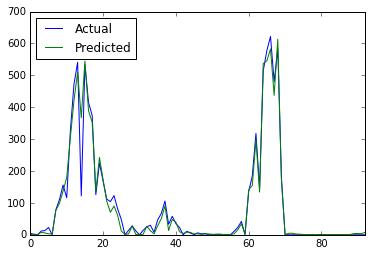

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
graphDF[['Actual','Predicted']].plot()

In [ ]:
model.reset_states()
testPredict = model.predict(testX, batch_size=1)

In [ ]:
testPredict[:,0]

array([ 4.269208  ,  7.1224895 ,  4.8240476 ,  4.4613657 ,  2.4537492 ,
        2.9091494 ,  1.1635873 ,  0.9678243 ,  0.8482704 ,  0.6054828 ,
        1.0359626 ,  0.25661403,  0.5858915 ,  3.0639696 ,  3.0639696 ,
        3.0639696 , 14.981855  , 79.68837   , 67.76666   ], dtype=float32)

In [ ]:
testGraphDF = pd.DataFrame(columns=['Week','Actual','Predicted'])
weeks = np.arange(len(testPredict[:,0]))
testGraphDF['Week']=weeks
testGraphDF['Actual']=testY
testGraphDF['Predicted']=testPredict[:,0]

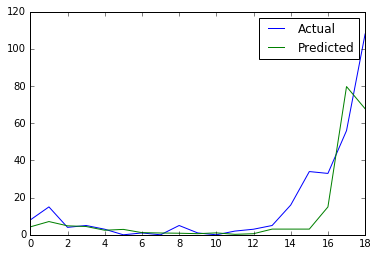

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
testGraphDF[['Actual','Predicted']].plot()

In [ ]:
testGraphDF.head(20)

,Week,Actual,Predicted
0,0,8,4.269208
1,1,15,7.122489
2,2,4,4.824048
3,3,5,4.461366
4,4,3,2.453749
5,5,0,2.909149
6,6,1,1.163587
7,7,0,0.967824
8,8,5,0.848270
9,9,1,0.605483


In [ ]:
import math
from sklearn.metrics import mean_squared_error
testscore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))

In [ ]:
testscore

14.042495824033

## Model with Week# and Last week Sales

In [ ]:
input_sales = newDataDF.as_matrix(columns=newDataDF.columns[3:]).reshape([1, 52*5])[0]

In [ ]:
input_sales=input_sales[:218]

In [ ]:
week_=0
formatted_input_sales = list()
for sale in input_sales:
    week_=week_+1
    formatted_input_sales.append([[week_,sale]])
    if (week_>=52):
        week_=0

In [ ]:
import numpy as np
formatted_input_sales=np.array(formatted_input_sales)

In [ ]:
train_size = int(len(formatted_input_sales)*0.67)
trainX_1, testX_1 = formatted_input_sales[0:train_size], formatted_input_sales[train_size:len(formatted_input_sales)-1]
trainY_1, testY_1 = input_sales[1:train_size+1], input_sales[train_size+1:len(formatted_input_sales)]

In [ ]:
trainY_1=np.array(trainY_1)
testY_1 = np.array(testY_1)

In [ ]:
trainY_1=np.reshape(trainY_1,(trainY_1.shape[0],1))
testY_1=np.reshape(testY_1,(testY_1.shape[0],1))

In [ ]:
trainX_1

array([[[  1,   1]],

       [[  2,   4]],

       [[  3,   7]],

       [[  4,  13]],

       [[  5,  34]],

       [[  6,  44]],

       [[  7,  53]],

       [[  8, 111]],

       [[  9, 188]],

       [[ 10, 283]],

       [[ 11, 378]],

       [[ 12, 406]],

       [[ 13, 389]],

       [[ 14, 569]],

       [[ 15, 536]],

       [[ 16, 402]],

       [[ 17, 385]],

       [[ 18, 304]],

       [[ 19, 256]],

       [[ 20, 206]],

       [[ 21, 151]],

       [[ 22, 147]],

       [[ 23, 144]],

       [[ 24, 104]],

       [[ 25,  70]],

       [[ 26,  55]],

       [[ 27,  27]],

       [[ 28,  24]],

       [[ 29,  11]],

       [[ 30,   9]],

       [[ 31,   2]],

       [[ 32,  12]],

       [[ 33,  13]],

       [[ 34,  11]],

       [[ 35,  23]],

       [[ 36,  18]],

       [[ 37,  29]],

       [[ 38,  32]],

       [[ 39,  28]],

       [[ 40,  25]],

       [[ 41,   9]],

       [[ 42,   4]],

       [[ 43,   6]],

       [[ 44,   3]],

       [[ 45,   4]],

       [[ 

In [ ]:
trainY_1

array([[  4],
       [  7],
       [ 13],
       [ 34],
       [ 44],
       [ 53],
       [111],
       [188],
       [283],
       [378],
       [406],
       [389],
       [569],
       [536],
       [402],
       [385],
       [304],
       [256],
       [206],
       [151],
       [147],
       [144],
       [104],
       [ 70],
       [ 55],
       [ 27],
       [ 24],
       [ 11],
       [  9],
       [  2],
       [ 12],
       [ 13],
       [ 11],
       [ 23],
       [ 18],
       [ 29],
       [ 32],
       [ 28],
       [ 25],
       [  9],
       [  4],
       [  6],
       [  3],
       [  4],
       [  0],
       [  0],
       [  0],
       [  0],
       [  1],
       [  0],
       [  2],
       [  4],
       [  2],
       [  0],
       [ 12],
       [ 13],
       [ 23],
       [  0],
       [ 78],
       [110],
       [156],
       [116],
       [326],
       [473],
       [541],
       [122],
       [534],
       [415],
       [374],
       [126],
       [225],
      

#### The below function is not used here 

In [ ]:
def create_dataset_with_Week(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.layers import LSTM
import numpy as np
np.random.seed(10)


# Step 1 First step of model creation
model1 = Sequential()

## Step 2 Add Layers
model1.add(LSTM(30,input_shape=(1, 2),activation='relu'))
#model.add(LSTM(25))
model1.add(Dense(20,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(15,activation='relu'))
model1.add(Dense(10,activation='relu'))
#model.add(LSTM(12,return_sequences=True))
model1.add(Dense(5,activation='relu'))
model1.add(Dense(1,activation='relu'))

In [ ]:
### Step 3 Compile Model
model1.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30)                3960      
_________________________________________________________________
dense_26 (Dense)             (None, 20)                620       
_________________________________________________________________
dropout_6 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_29 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 6         
Total para

In [ ]:
model1.fit(trainX_1, trainY_1, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 3s - loss: 31908.0829 - acc: 0.1027
Epoch 2/100
 - 1s - loss: 14343.3864 - acc: 0.0137
Epoch 3/100
 - 1s - loss: 9051.4325 - acc: 0.0137
Epoch 4/100
 - 1s - loss: 8007.2236 - acc: 0.0205
Epoch 5/100
 - 1s - loss: 8512.2704 - acc: 0.0411
Epoch 6/100
 - 1s - loss: 6776.2159 - acc: 0.0342
Epoch 7/100
 - 1s - loss: 7639.1112 - acc: 0.0274
Epoch 8/100
 - 1s - loss: 7529.1142 - acc: 0.0548
Epoch 9/100
 - 1s - loss: 7919.8436 - acc: 0.0411
Epoch 10/100
 - 0s - loss: 7770.4276 - acc: 0.0342
Epoch 11/100
 - 1s - loss: 7683.4054 - acc: 0.0479
Epoch 12/100
 - 0s - loss: 8054.2736 - acc: 0.0205
Epoch 13/100
 - 1s - loss: 7747.3223 - acc: 0.0411
Epoch 14/100
 - 0s - loss: 6976.7170 - acc: 0.0274
Epoch 15/100
 - 1s - loss: 7580.4039 - acc: 0.0342
Epoch 16/100
 - 0s - loss: 8142.1996 - acc: 0.0548
Epoch 17/100
 - 1s - loss: 7723.8054 - acc: 0.0548
Epoch 18/100
 - 0s - loss: 8003.1580 - acc: 0.0137
Epoch 19/100
 - 1s - loss: 8411.0503 - acc: 0.0342
Epoch 20/100
 - 1s - loss: 6902.7655 -

In [ ]:
trainPredict1 = model1.predict(trainX_1)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
trainScore1 = math.sqrt(mean_squared_error(trainY_1, trainPredict1[:,0]))

In [ ]:
trainScore1

79.922315039802

In [ ]:
trainPredict1[:,0]

array([  2.1216896,   2.108173 ,  12.3222275,  25.383572 ,  44.079666 ,
        56.19342  ,  67.769325 , 121.280136 , 183.21098  , 259.1797   ,
       335.14847  , 358.865    , 347.48685  , 489.7457   , 465.88934  ,
       363.2648   , 351.88663  , 290.59592  , 255.04135  , 217.92703  ,
       176.91327  , 175.67355  , 174.97627  ,  88.017685 ,  41.02523  ,
        37.14598  ,  24.712528 ,  22.461212 ,  12.845123 ,  11.5107   ,
         2.2704773,  12.717133 ,  12.948629 ,  12.077202 ,  18.57583  ,
        13.953426 ,  22.6786   ,  24.719948 ,  20.965767 ,  16.580149 ,
        11.676601 ,   1.8515062,   4.429459 ,   1.2880483,   1.2880483,
         1.2880483,   1.2880483,   1.2880483,   1.2880483,   1.2880483,
         1.2880483,   1.2880483,   2.1367774,   2.0958738,  16.06483  ,
        22.850351 ,  25.093967 ,  31.57794  ,  81.33229  ,  95.544    ,
       122.38008  , 160.13454  , 130.81905  , 296.47433  , 412.99698  ,
       467.90897  , 143.01767  , 466.20944  , 375.2831   , 345.1

In [ ]:
graphDF1 = pd.DataFrame(columns=['Week','Actual','Predicted'])
weeks1 = np.arange(len(trainPredict1[:,0]))
graphDF1['Week']=weeks1
graphDF1['Actual']=trainY_1
graphDF1['Predicted']=trainPredict1[:,0]

In [ ]:
graphDF1.head(10)

,Week,Actual,Predicted
0,0,4,2.121690
1,1,7,2.108173
2,2,13,12.322227
3,3,34,25.383572
4,4,44,44.079666
5,5,53,56.193420
6,6,111,67.769325
7,7,188,121.280136
8,8,283,183.210983
9,9,378,259.179688


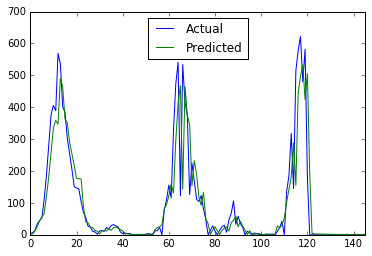

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
graphDF1[['Actual','Predicted']].plot()

In [ ]:
model1.reset_states()
testPredict1 = model1.predict(testX_1, batch_size=1)

In [ ]:
lst2 = [item[0] for item in testX_1]
lst = [item[0]+1 for item in lst2]

In [ ]:
testGraphDF1 = pd.DataFrame(columns=['Week','Actual','Predicted'])
weeks1 = lst
testGraphDF1['Week']=weeks1
testGraphDF1['Actual']=testY_1
testGraphDF1['Predicted']=testPredict1[:,0]

In [ ]:
testGraphDF1.head(72)

,Week,Actual,Predicted
0,44,0,1.288048
1,45,0,1.288048
2,46,0,1.288048
3,47,0,1.288048
4,48,0,1.288048
5,49,0,1.288048
6,50,0,1.288048
7,51,0,1.288048
8,52,0,1.288048
9,53,0,1.288048


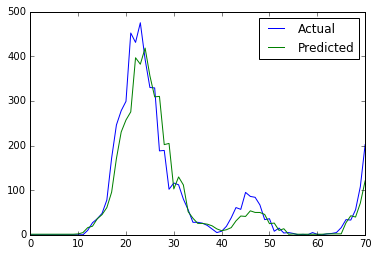

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
testGraphDF1[['Actual','Predicted']].plot()

In [ ]:
import math
from sklearn.metrics import mean_squared_error
testscore1 = math.sqrt(mean_squared_error(testY_1, testPredict1[:,0]))

In [ ]:
testscore1

37.97202101524385

In [ ]:
testGraphDF1.to_excel('Model 1_Test.xlsx')

### Use current week number and Last week sales as inputs to model

In [ ]:
input_sales = newDataDF.as_matrix(columns=newDataDF.columns[3:]).reshape([1, 52*5])[0]

In [ ]:
input_sales=input_sales[:218]

In [ ]:
week_=1
formatted_input_sales = list()
for sale in input_sales:
    week_=week_+1
    formatted_input_sales.append([[week_,sale]])
    if (week_>=52):
        week_=0

In [ ]:
import numpy as np
formatted_input_sales=np.array(formatted_input_sales)

In [ ]:
train_size = int(len(formatted_input_sales)*0.67)
trainX_2, testX_2 = formatted_input_sales[0:train_size], formatted_input_sales[train_size:len(formatted_input_sales)-1]
trainY_2, testY_2 = input_sales[1:train_size+1], input_sales[train_size+1:len(formatted_input_sales)]
trainY_2=np.array(trainY_2)
testY_2 = np.array(testY_2)
trainY_2=np.reshape(trainY_2,(trainY_2.shape[0],1))
testY_2=np.reshape(testY_2,(testY_2.shape[0],1))

In [ ]:
trainX_2

array([[[  2,   1]],

       [[  3,   4]],

       [[  4,   7]],

       [[  5,  13]],

       [[  6,  34]],

       [[  7,  44]],

       [[  8,  53]],

       [[  9, 111]],

       [[ 10, 188]],

       [[ 11, 283]],

       [[ 12, 378]],

       [[ 13, 406]],

       [[ 14, 389]],

       [[ 15, 569]],

       [[ 16, 536]],

       [[ 17, 402]],

       [[ 18, 385]],

       [[ 19, 304]],

       [[ 20, 256]],

       [[ 21, 206]],

       [[ 22, 151]],

       [[ 23, 147]],

       [[ 24, 144]],

       [[ 25, 104]],

       [[ 26,  70]],

       [[ 27,  55]],

       [[ 28,  27]],

       [[ 29,  24]],

       [[ 30,  11]],

       [[ 31,   9]],

       [[ 32,   2]],

       [[ 33,  12]],

       [[ 34,  13]],

       [[ 35,  11]],

       [[ 36,  23]],

       [[ 37,  18]],

       [[ 38,  29]],

       [[ 39,  32]],

       [[ 40,  28]],

       [[ 41,  25]],

       [[ 42,   9]],

       [[ 43,   4]],

       [[ 44,   6]],

       [[ 45,   3]],

       [[ 46,   4]],

       [[ 

In [ ]:
trainY_2

array([[  4],
       [  7],
       [ 13],
       [ 34],
       [ 44],
       [ 53],
       [111],
       [188],
       [283],
       [378],
       [406],
       [389],
       [569],
       [536],
       [402],
       [385],
       [304],
       [256],
       [206],
       [151],
       [147],
       [144],
       [104],
       [ 70],
       [ 55],
       [ 27],
       [ 24],
       [ 11],
       [  9],
       [  2],
       [ 12],
       [ 13],
       [ 11],
       [ 23],
       [ 18],
       [ 29],
       [ 32],
       [ 28],
       [ 25],
       [  9],
       [  4],
       [  6],
       [  3],
       [  4],
       [  0],
       [  0],
       [  0],
       [  0],
       [  1],
       [  0],
       [  2],
       [  4],
       [  2],
       [  0],
       [ 12],
       [ 13],
       [ 23],
       [  0],
       [ 78],
       [110],
       [156],
       [116],
       [326],
       [473],
       [541],
       [122],
       [534],
       [415],
       [374],
       [126],
       [225],
      

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.layers import LSTM
import numpy as np
np.random.seed(10)


# Step 1 First step of model creation
model2 = Sequential()

## Step 2 Add Layers
model2.add(LSTM(30,input_shape=(1, 2),activation='relu'))
#model.add(LSTM(25))
model2.add(Dense(20,activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(15,activation='relu'))
model2.add(Dense(10,activation='relu'))
#model.add(LSTM(12,return_sequences=True))
model2.add(Dense(5,activation='relu'))
model2.add(Dense(1,activation='relu'))


### Step 3 Compile Model
model2.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model2.fit(trainX_2, trainY_2, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 3s - loss: 31971.4774 - acc: 0.1096
Epoch 2/100
 - 1s - loss: 15496.6349 - acc: 0.0000e+00
Epoch 3/100
 - 1s - loss: 8840.2464 - acc: 0.0205
Epoch 4/100
 - 1s - loss: 7793.6999 - acc: 0.0137
Epoch 5/100
 - 1s - loss: 8436.6199 - acc: 0.0137
Epoch 6/100
 - 1s - loss: 6838.2316 - acc: 0.0137
Epoch 7/100
 - 1s - loss: 7825.7188 - acc: 0.0274
Epoch 8/100
 - 1s - loss: 7905.2928 - acc: 0.0274
Epoch 9/100
 - 1s - loss: 7607.6257 - acc: 0.0342
Epoch 10/100
 - 1s - loss: 8001.9554 - acc: 0.0000e+00
Epoch 11/100
 - 1s - loss: 7418.8099 - acc: 0.0205
Epoch 12/100
 - 1s - loss: 8478.5924 - acc: 0.0479
Epoch 13/100
 - 1s - loss: 7626.2675 - acc: 0.0000e+00
Epoch 14/100
 - 1s - loss: 7077.5604 - acc: 0.0274
Epoch 15/100
 - 1s - loss: 8103.4023 - acc: 0.0274
Epoch 16/100
 - 1s - loss: 8424.1145 - acc: 0.0342
Epoch 17/100
 - 1s - loss: 8009.1706 - acc: 0.0137
Epoch 18/100
 - 1s - loss: 8308.0820 - acc: 0.0137
Epoch 19/100
 - 1s - loss: 8363.5305 - acc: 0.0411
Epoch 20/100
 - 1s - loss:

In [ ]:
trainPredict2 = model2.predict(trainX_2)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
trainScore2 = math.sqrt(mean_squared_error(trainY_2, trainPredict2[:,0]))

In [ ]:
trainScore2

80.1612959457188

In [ ]:
graphDF2 = pd.DataFrame(columns=['Week','Actual','Predicted'])
weeks1 = np.arange(len(trainPredict2[:,0]))
graphDF2['Week']=weeks1
graphDF2['Actual']=trainY_2
graphDF2['Predicted']=trainPredict2[:,0]

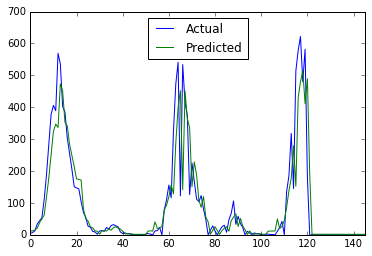

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
graphDF2[['Actual','Predicted']].plot()

In [ ]:
model2.reset_states()
testPredict2 = model2.predict(testX_2, batch_size=1)

In [ ]:
lst2 = [item[0] for item in testX_2]
lst = [item[0] for item in lst2]

In [ ]:
testgraphDF2 = pd.DataFrame(columns=['Week','Actual','Predicted'])
weeks1 = lst
testgraphDF2['Week']=weeks1
testgraphDF2['Actual']=testY_2
testgraphDF2['Predicted']=testPredict2[:,0]

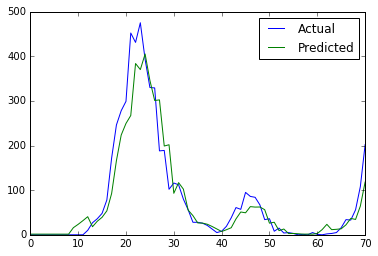

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
testgraphDF2[['Actual','Predicted']].plot()

In [ ]:
import math
from sklearn.metrics import mean_squared_error
testscore2 = math.sqrt(mean_squared_error(testY_2, testPredict2[:,0]))

In [ ]:
testscore2

39.446200804294975

In [ ]:
testgraphDF2.to_excel('Model 2_Test.xlsx')

### Model with Week Number and n weeks of sales

In [ ]:
input_sales = newDataDF.as_matrix(columns=newDataDF.columns[3:]).reshape([1, 52*5])[0]

input_sales=input_sales[:218]

In [ ]:
sale_periods = 4

In [ ]:

week_=sale_periods
formatted_input_sales = list()
for i in range(len(input_sales)-sale_periods):
    week_=week_+1
    in_array=[week_]
    in_array.extend(input_sales[i:i+sale_periods])
    #formatted_input_sales.append([[week_,input_sales[i],input_sales[i+1],input_sales[i+2]]]) ## This needs a change with period
    formatted_input_sales.append([in_array]) ## This needs a change with period
    if (week_>=52):
        week_=0

In [ ]:
import numpy as np
formatted_input_sales=np.array(formatted_input_sales)

In [ ]:
train_size = int(len(formatted_input_sales)*0.67)
trainX_3, testX_3 = formatted_input_sales[0:train_size], \
        formatted_input_sales[train_size:len(formatted_input_sales)]

In [ ]:
trainY_3, testY_3 = input_sales[sale_periods:train_size+sale_periods],\
        input_sales[train_size+sale_periods:len(input_sales)]

In [ ]:
trainY_3=np.array(trainY_3)
testY_3 = np.array(testY_3)
trainY_3=np.reshape(trainY_3,(trainY_3.shape[0],1))
testY_3=np.reshape(testY_3,(testY_3.shape[0],1))

In [ ]:
trainX_3

array([[[  5,   1,   4,   7,  13]],

       [[  6,   4,   7,  13,  34]],

       [[  7,   7,  13,  34,  44]],

       [[  8,  13,  34,  44,  53]],

       [[  9,  34,  44,  53, 111]],

       [[ 10,  44,  53, 111, 188]],

       [[ 11,  53, 111, 188, 283]],

       [[ 12, 111, 188, 283, 378]],

       [[ 13, 188, 283, 378, 406]],

       [[ 14, 283, 378, 406, 389]],

       [[ 15, 378, 406, 389, 569]],

       [[ 16, 406, 389, 569, 536]],

       [[ 17, 389, 569, 536, 402]],

       [[ 18, 569, 536, 402, 385]],

       [[ 19, 536, 402, 385, 304]],

       [[ 20, 402, 385, 304, 256]],

       [[ 21, 385, 304, 256, 206]],

       [[ 22, 304, 256, 206, 151]],

       [[ 23, 256, 206, 151, 147]],

       [[ 24, 206, 151, 147, 144]],

       [[ 25, 151, 147, 144, 104]],

       [[ 26, 147, 144, 104,  70]],

       [[ 27, 144, 104,  70,  55]],

       [[ 28, 104,  70,  55,  27]],

       [[ 29,  70,  55,  27,  24]],

       [[ 30,  55,  27,  24,  11]],

       [[ 31,  27,  24,  11,   9]],

 

In [ ]:
testY_3

array([[  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [ 10],
       [ 27],
       [ 36],
       [ 48],
       [ 78],
       [172],
       [246],
       [278],
       [299],
       [452],
       [431],
       [475],
       [393],
       [330],
       [329],
       [188],
       [189],
       [102],
       [116],
       [112],
       [ 80],
       [ 56],
       [ 28],
       [ 28],
       [ 26],
       [ 21],
       [ 13],
       [  5],
       [  8],
       [ 19],
       [ 38],
       [ 61],
       [ 57],
       [ 95],
       [ 86],
       [ 84],
       [ 67],
       [ 34],
       [ 36],
       [  8],
       [ 15],
       [  4],
       [  5],
       [  3],
       [  0],
       [  1],
       [  0],
       [  5],
       [  1],
       [  0],
       [  2],
       [  3],
       [  5],
       [ 16],
       [ 34],
       [ 33],
       [ 56],
       [108],
       [202]], dtype

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.layers import LSTM
import numpy as np
np.random.seed(10)


# Step 1 First step of model creation
model3 = Sequential()

## Step 2 Add Layers
model3.add(LSTM(30,input_shape=(1, sale_periods+1),activation='relu'))
#model.add(LSTM(25))
model3.add(Dense(20,activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(15,activation='relu'))
model3.add(Dense(10,activation='relu'))
#model.add(LSTM(12,return_sequences=True))
model3.add(Dense(5,activation='relu'))
model3.add(Dense(1,activation='relu'))


### Step 3 Compile Model
model3.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model3.fit(trainX_3, trainY_3, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 3s - loss: 34641.0039 - acc: 0.1608
Epoch 2/100
 - 1s - loss: 19619.9496 - acc: 0.0490
Epoch 3/100
 - 1s - loss: 9390.8158 - acc: 0.1538
Epoch 4/100
 - 1s - loss: 7936.2684 - acc: 0.1748
Epoch 5/100
 - 1s - loss: 7701.1670 - acc: 0.2028
Epoch 6/100
 - 1s - loss: 8181.2533 - acc: 0.1818
Epoch 7/100
 - 1s - loss: 6898.8359 - acc: 0.0629
Epoch 8/100
 - 1s - loss: 7685.5665 - acc: 0.2028
Epoch 9/100
 - 1s - loss: 7900.7120 - acc: 0.1678
Epoch 10/100
 - 1s - loss: 6572.0220 - acc: 0.2098
Epoch 11/100
 - 1s - loss: 6619.4481 - acc: 0.1888
Epoch 12/100
 - 1s - loss: 6391.7417 - acc: 0.1818
Epoch 13/100
 - 1s - loss: 5961.9685 - acc: 0.1888
Epoch 14/100
 - 1s - loss: 5819.5126 - acc: 0.1818
Epoch 15/100
 - 1s - loss: 5360.8814 - acc: 0.1678
Epoch 16/100
 - 1s - loss: 5166.9761 - acc: 0.1049
Epoch 17/100
 - 1s - loss: 5889.4479 - acc: 0.1748
Epoch 18/100
 - 1s - loss: 5287.6879 - acc: 0.1259
Epoch 19/100
 - 1s - loss: 5108.2627 - acc: 0.1469
Epoch 20/100
 - 1s - loss: 6373.7909 -

In [ ]:
trainPredict3 = model3.predict(trainX_3)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
trainScore3 = math.sqrt(mean_squared_error(trainY_3, trainPredict3[:,0]))

In [ ]:
trainScore3

45.20587806888049

In [ ]:
graphDF3 = pd.DataFrame(columns=['Week','Actual','Predicted'])
weeks1 = np.arange(len(trainPredict3[:,0]))
graphDF3['Week']=weeks1
graphDF3['Actual']=trainY_3
graphDF3['Predicted']=trainPredict3[:,0]

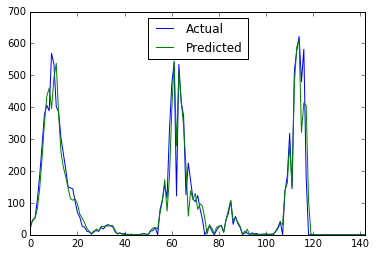

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
graphDF3[['Actual','Predicted']].plot()

In [ ]:
model3.reset_states()
testPredict3 = model3.predict(testX_3, batch_size=1)

In [ ]:
lst2 = [item[0] for item in testX_3]
lst = [item[0] for item in lst2]

In [ ]:
testgraphDF3 = pd.DataFrame(columns=['Week','Actual','Predicted'])
weeks1 = lst
testgraphDF3['Week']=weeks1
testgraphDF3['Actual']=testY_3
testgraphDF3['Predicted']=testPredict3[:,0]

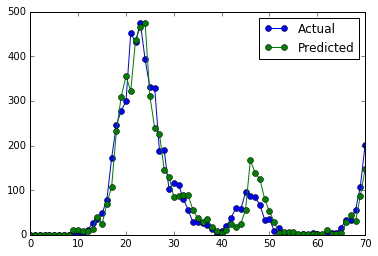

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
testgraphDF3[['Actual','Predicted']].plot(marker='o')

In [ ]:
import math
from sklearn.metrics import mean_squared_error
testscore3 = math.sqrt(mean_squared_error(testY_3, testPredict3[:,0]))

In [ ]:
testscore3

32.44560702155532

In [ ]:
testgraphDF3.to_excel('Model 3_Test.xlsx')

In [ ]:
completeDF = graphDF3.append(testgraphDF3, ignore_index=True)

In [ ]:
completeDF.to_excel('Model 3_Full.xlsx')